# Federated Learning with Tensorflow

## Testing neural network

In [1]:
import tensorflow as tf


In [2]:
mnist= tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

2022-01-22 15:10:32.033762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9751


[0.08132339268922806, 0.9750999808311462]

## Smart + Dataset 

### Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
path="/Users/daniel.bustillo/Documents/thesis"

In [3]:
os.chdir(path)

In [4]:
#Reading all years from House A
#home_a_1= pd.read_csv("Dataset/HomeA/2014/HomeA-meter2_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
#home_a_2= pd.read_csv("Dataset/HomeA/2014/HomeA-meter3_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_a_1_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter2_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter3_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_a_1_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter2_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter3_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)


In [ ]:
#Reading all years from House B

# home_b_1 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
# home_b_2 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [ ]:
#Reading all years from House C
# home_c_1 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
# home_c_2 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [5]:
home_a_2_15= home_a_2_15.resample("30T").mean()
home_a_1_16=home_a_1_16.resample("30T").mean()
home_a_2_16 = home_a_2_16.resample("30T").mean()

In [6]:
#home_a_2 =home_a_2.drop("use [kW]", axis=1)
#home_a= home_a_1.merge(right= home_a_2, how="outer",left_index= True, right_index= True)

home_a_2_15 =home_a_2_15.drop("use [kW]", axis=1)
home_a_15= home_a_1_15.merge(right= home_a_2_15, how="outer",left_index= True, right_index= True)

home_a_2_16 =home_a_2_16.drop("use [kW]", axis=1)
home_a_16= home_a_1_16.merge(right= home_a_2_16, how="outer",left_index= True, right_index= True)


In [7]:
# dfs=[home_a, home_a_15, home_a_16]
dfs=[home_a_15, home_a_16]

home_a= pd.concat(dfs)

In [6]:
# home_b_2= home_b_2.drop('use [kW]', axis=1)

# home_b= home_b_1.merge(right=home_b_2, how='outer', left_index=True, right_index=True)

In [7]:
# home_c_2= home_c_2.drop('use [kW]', axis=1)

# home_c= home_c_1.merge(right=home_c_2, how='outer', left_index=True, right_index=True)

In [8]:
#sum all of the electricity consumption
def sum_power(df, label="total"):
    df[label] = df.sum(axis=1)
    return df

In [9]:
#home_a['total'].plot(figsize=(25,5),logy=False, lw=1)

def plot_electricity(df, label="total", figsize=(25,10)):
    df[label].plot(figsize=figsize, lw=1)


<AxesSubplot:xlabel='Date & Time'>

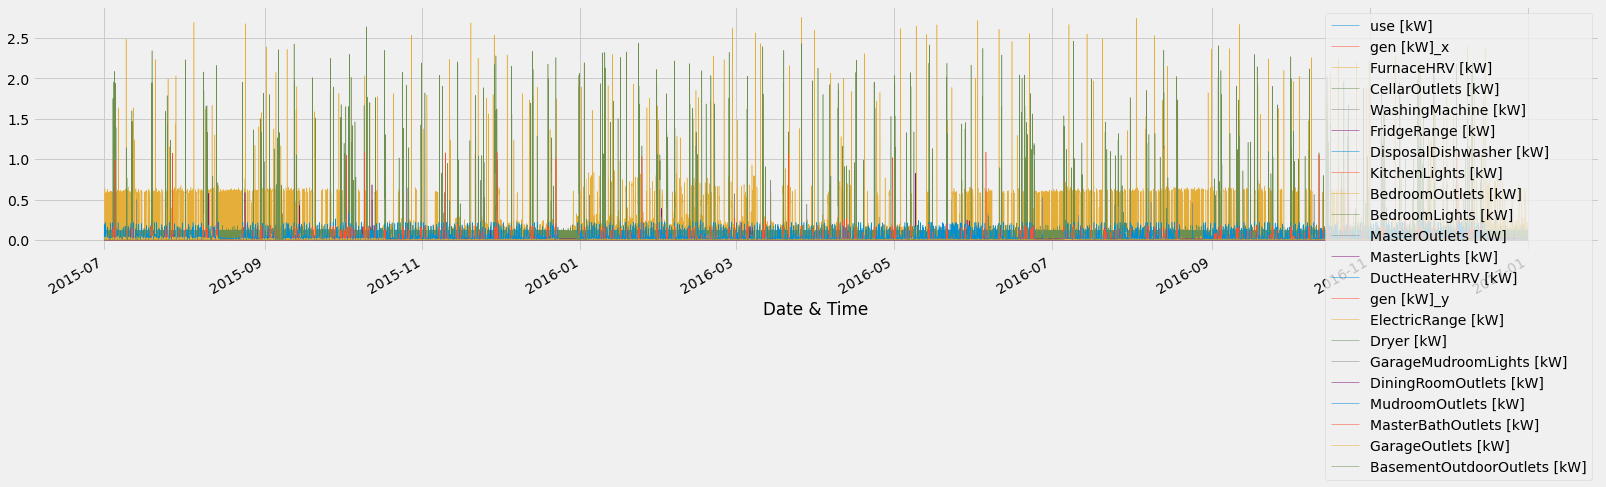

In [10]:
home_a.loc[home_a.index>"2015-07-01"].plot(figsize=(25,5), lw=0.5)

In [11]:
# We subset the data to only have 1 and a half years, it seems that the whole month of June is corrupted
home_a = home_a.loc[home_a.index>"2015-07-01"].copy()

In [19]:
cols_outliers = ['MasterOutlets [kW]','MasterLights [kW]','KitchenLights [kW]', 'BedroomOutlets [kW]','BedroomLights [kW]','DuctHeaterHRV [kW]','ElectricRange [kW]','Dryer [kW]','GarageMudroomLights [kW]',
'DiningRoomOutlets [kW]','MudroomOutlets [kW]','MasterBathOutlets [kW]','GarageOutlets [kW]','BasementOutdoorOutlets [kW]']

### Some EDA 

In [20]:
def rm_outliers(df,cols):
    for i in cols:
        df[i] = np.where(df[i]>4,df[i].median(),df[i])
    return df.describe()


In [21]:
rm_outliers(home_a, cols_outliers)

use [kW]  gen [kW]_x  FurnaceHRV [kW]  CellarOutlets [kW]  \
count   26399.0     26399.0     26399.000000        26399.000000   
mean        0.0         0.0         0.158699            0.080120   
std         0.0         0.0         0.203181            0.036959   
min         0.0         0.0         0.003162            0.000317   
25%         0.0         0.0         0.010063            0.049604   
50%         0.0         0.0         0.086205            0.085248   
75%         0.0         0.0         0.160827            0.114262   
max         0.0         0.0         0.929004            0.223113   

       WashingMachine [kW]  FridgeRange [kW]  DisposalDishwasher [kW]  \
count         2.639900e+04      2.639900e+04             26399.000000   
mean          4.914432e-04      1.340545e-03                 0.000135   
std           7.119371e-04      7.521273e-03                 0.000134   
min           5.560000e-07      5.560000e-07                 0.000000   
25%           3.305550e-05      9.244440e-04                 0.000033   
50%           1.088890e-04      1.013889e-03                 0.000076   
75%           6.650000e-04      1.048333e-03                 0.000212   
max           7.663889e-03      6.453717e-01                 0.001198   

       KitchenLights [kW]  BedroomOutlets [kW]  BedroomLights [kW]  ...  \
count        26399.000000         26399.000000        26399.000000  ...   
mean             0.000051             0.008721            0.005913  ...   
std              0.000073             0.005016            0.005456  ...   
min              0.000000             0.000183            0.000117  ...   
25%              0.000009             0.004098            0.004606  ...   
50%              0.000022             0.007965            0.004656  ...   
75%              0.000067             0.011069            0.004705  ...   
max              0.001560             0.153472            0.083535  ...   

       DuctHeaterHRV [kW]  gen [kW]_y  ElectricRange [kW]    Dryer [kW]  \
count        26399.000000     25625.0        25625.000000  25625.000000   
mean             0.003626         0.0            0.021898      0.045901   
std              0.008781         0.0            0.168479      0.234988   
min              0.000006         0.0            0.000067      0.000014   
25%              0.000030         0.0            0.003816      0.003411   
50%              0.000047         0.0            0.003881      0.003771   
75%              0.000137         0.0            0.003948      0.003829   
max              0.051692         0.0            2.750854      2.635057   

       GarageMudroomLights [kW]  DiningRoomOutlets [kW]  MudroomOutlets [kW]  \
count              25625.000000            25625.000000         25625.000000   
mean                   0.009652                0.002095             0.014118   
std                    0.013107                0.011892             0.037400   
min                    0.000067                0.000003             0.000005   
25%                    0.003744                0.001757             0.002926   
50%                    0.003880                0.001802             0.002950   
75%                    0.004722                0.001854             0.002999   
max                    0.121070                0.868588             0.370500   

       MasterBathOutlets [kW]  GarageOutlets [kW]  BasementOutdoorOutlets [kW]  
count            25625.000000        25625.000000                 25625.000000  
mean                 0.010787            0.006705                     0.006255  
std                  0.044727            0.003200                     0.025607  
min                  0.000083            0.000067                     0.000000  
25%                  0.004814            0.005921                     0.000603  
50%                  0.004839            0.006016                     0.004389  
75%                  0.004865            0.006087                     0.008035  
max            

In [27]:
# print(home_a['KitchenLights [kW]'].quantile(0.5))
# print(home_a['KitchenLights [kW]'].quantile(0.95))
# print(home_a['KitchenLights [kW]'].median())

# home_a['KitchenLights [kW]'] = np.where(home_a['KitchenLights [kW]']>home_a['KitchenLights [kW]'].quantile(0.95),home_a['KitchenLights [kW]'].median(),home_a['KitchenLights [kW]'])
# home_a.describe()

7.5e-05
0.2487190557
7.5e-05


use [kW]  gen [kW]_x  FurnaceHRV [kW]  CellarOutlets [kW]  \
count   52610.0     52610.0     52610.000000        52610.000000   
mean        0.0         0.0         0.171077            0.070056   
std         0.0         0.0         0.205706            0.039665   
min         0.0         0.0         0.000000            0.000000   
25%         0.0         0.0         0.018897            0.037305   
50%         0.0         0.0         0.087271            0.071004   
75%         0.0         0.0         0.200432            0.108267   
max         0.0         0.0         0.929004            0.458419   

       WashingMachine [kW]  FridgeRange [kW]  DisposalDishwasher [kW]  \
count         52610.000000      52610.000000             52610.000000   
mean              0.003703          0.024884                 0.008870   
std               0.018354          0.047380                 0.061520   
min               0.000000          0.000000                 0.000000   
25%               0.000056          0.000923                 0.000049   
50%               0.000495          0.001042                 0.000182   
75%               0.005508          0.027254                 0.004944   
max               1.074639          0.992466                 0.889513   

       KitchenLights [kW]  BedroomOutlets [kW]  BedroomLights [kW]  ...  \
count        52610.000000         52610.000000        52610.000000  ...   
mean             0.007946             0.026919            0.043538  ...   
std              0.034345             0.444707            7.892213  ...   
min              0.000000             0.000000            0.000000  ...   
25%              0.000014             0.006782            0.004626  ...   
50%              0.000075             0.011124            0.004699  ...   
75%              0.002935             0.016099            0.004896  ...   
max              0.248717           100.787772         1810.228775  ...   

       DuctHeaterHRV [kW]  gen [kW]_y  ElectricRange [kW]    Dryer [kW]  \
count        52610.000000     51836.0        51836.000000  51836.000000   
mean             0.193163         0.0            0.074350      0.047180   
std             30.439323         0.0            9.795457      3.581652   
min              0.000000         0.0            0.000000      0.000000   
25%              0.000039         0.0            0.002872      0.003385   
50%              0.020038         0.0            0.003777      0.003808   
75%              0.034254         0.0            0.003911      0.005506   
max           6981.831507         0.0         1999.719154    701.322889   

       GarageMudroomLights [kW]  DiningRoomOutlets [kW]  MudroomOutlets [kW]  \
count              51836.000000            51836.000000         51836.000000   
mean                   0.031673                0.039593             0.012217   
std                    4.183426                6.190688             0.973998   
min                    0.000000                0.000000             0.000000   
25%                    0.003716                0.000000             0.000000   
50%                    0.004337                0.000151             0.002877   
75%                    0.012758                0.001803             0.002951   
max                  948.435236             1012.706751           219.545362   

       MasterBathOutlets [kW]  GarageOutlets [kW]  BasementOutdoorOutlets [kW]  
count            51836.000000        51836.000000                 51836.000000  
mean                 0.013699            0.005868                     0.008299  
std                  1.336612            0.406882                     0.962444  
min                  0.000000            0.000000                     0.000000  
25%                  0.000000            0.000000                     0.000000  
50%                  0.004657            0.004454                     0.000559  
75%                  0.004841            0.006018                     0.004387  
max            

In [12]:
sum_power(home_a)

use [kW]  gen [kW]_x  FurnaceHRV [kW]  \
Date & Time                                                  
2015-07-01 00:30:00       0.0         0.0         0.211772   
2015-07-01 01:00:00       0.0         0.0         0.009855   
2015-07-01 01:30:00       0.0         0.0         0.009825   
2015-07-01 02:00:00       0.0         0.0         0.009701   
2015-07-01 02:30:00       0.0         0.0         0.009638   
...                       ...         ...              ...   
2016-12-31 21:30:00       0.0         0.0         0.140308   
2016-12-31 22:00:00       0.0         0.0         0.102705   
2016-12-31 22:30:00       0.0         0.0         0.102992   
2016-12-31 23:00:00       0.0         0.0         0.120551   
2016-12-31 23:30:00       0.0         0.0         0.086512   

                     CellarOutlets [kW]  WashingMachine [kW]  \
Date & Time                                                    
2015-07-01 00:30:00            0.018335             0.000523   
2015-07-01 01:00:00            0.108641             0.000025   
2015-07-01 01:30:00            0.080918             0.000020   
2015-07-01 02:00:00            0.046086             0.000014   
2015-07-01 02:30:00            0.114888             0.000027   
...                                 ...                  ...   
2016-12-31 21:30:00            0.111428             0.000668   
2016-12-31 22:00:00            0.019827             0.000421   
2016-12-31 22:30:00            0.115550             0.000207   
2016-12-31 23:00:00            0.028696             0.000119   
2016-12-31 23:30:00            0.101802             0.000082   

                     FridgeRange [kW]  DisposalDishwasher [kW]  \
Date & Time                                                      
2015-07-01 00:30:00          0.000881                 0.000328   
2015-07-01 01:00:00          0.000987                 0.000089   
2015-07-01 01:30:00          0.000988                 0.000079   
2015-07-01 02:00:00          0.000969                 0.000099   
2015-07-01 02:30:00          0.000974                 0.000073   
...                               ...                      ...   
2016-12-31 21:30:00          0.000987                 0.000163   
2016-12-31 22:00:00          0.000985                 0.000156   
2016-12-31 22:30:00          0.001022                 0.000054   
2016-12-31 23:00:00          0.001024                 0.000044   
2016-12-31 23:30:00          0.001049                 0.000005   

                     KitchenLights [kW]  BedroomOutlets [kW]  \
Date & Time                                                    
2015-07-01 00:30:00            0.000137             0.015814   
2015-07-01 01:00:00            0.000061             0.016096   
2015-07-01 01:30:00            0.000054             0.016083   
2015-07-01 02:00:00            0.000064             0.015916   
2015-07-01 02:30:00            0.000052             0.015855   
...                                 ...                  ...   
2016-12-31 21:30:00            0.000017             0.007810   
2016-12-31 22:00:00            0.000016             0.007757   
2016-12-31 22:30:00            0.000007             0.007622   
2016-12-31 23:00:00            0.000009             0.006573   
2016-12-31 23:30:00            0.000010             0.004698   

                     BedroomLights [kW]  ...  gen [kW]_y  ElectricRange [kW]  \
Date & Time                              ...                                   
2015-07-01 00:30:00            0.004690  ...         0.0            0.003862   
2015-07-01 01:00:00            0.004674  ...         0.0            0.003807   
2015-07-01 01:30:00            0.004666  ...         0.0            0.003801   
2015-07-01 02:00:00            0.004657  ...         0.0            0.003787   
2015-07-01 02:30:00            0.004643  ...         0.0            0.003756   
...                                 ...  ...         ...                 ...   
2016-12-31 21:30:00            0.004730  ...     

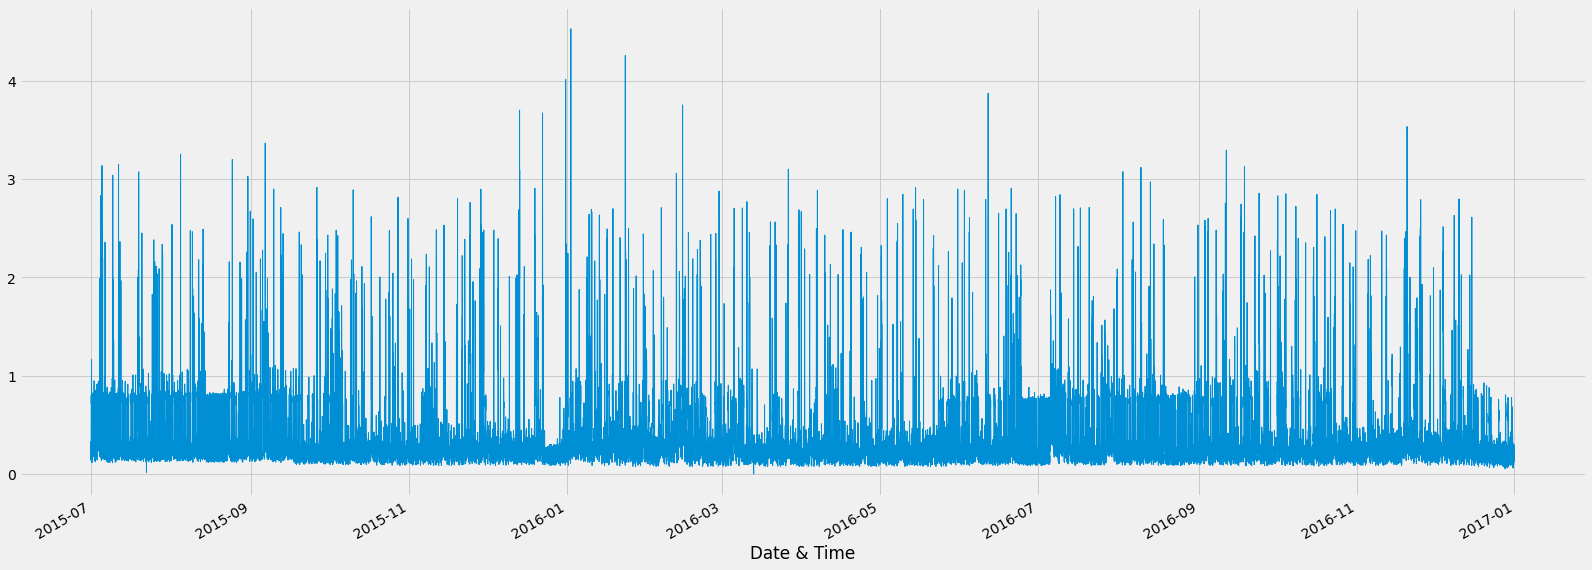

In [13]:
plot_electricity(home_a)

### Simple ARIMA model

In [26]:
# simple ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [27]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(home_a['total'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.366496
p-value: 0.000000


In [38]:
# Original Series
# fig, axes = plt.subplots(3, 2)
# axes[0, 0].plot(home_a['total'], lw=0.5); axes[0, 0].set_title('Original Series')
# plot_acf(home_a['total'], ax=axes[0, 1],lw=0.5)

# # 1st Differencing
# axes[1, 0].plot(home_a['total'].diff(),lw=0.5); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(home_a['total'].diff().dropna(), ax=axes[1, 1],lw=0.5)

# # 2nd Differencing
# axes[2, 0].plot(home_a['total'].diff().diff(),lw=0.5); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(home_a['total'].diff().diff().dropna(), ax=axes[2, 1],lw=0.5)

# plt.show()

In [43]:
#Fitting the model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = np.sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
evaluate_models(home_a['total'], p_values, d_values, q_values)

/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

In [15]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    # df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night']= np.where((df['hour']>=18)|(df['hour']<6),1,0)
    
    # X = df[['hour','dayofweek','quarter','month','year',
    #        'dayofyear','dayofmonth']]
    # if label:
    #     y = df[label]
    #     return X, y
    # return X

# X, y = create_features(home_a, label='total')

# features_and_target = pd.concat([X, y], axis=1)

In [16]:
create_features(home_a)

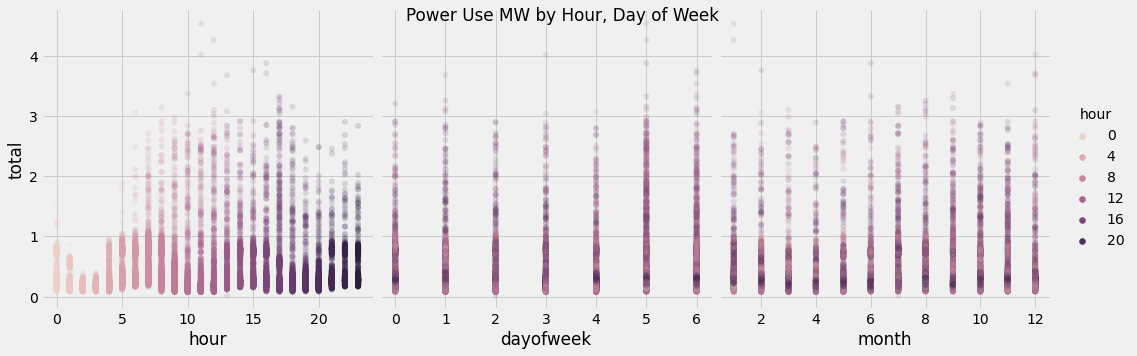

In [17]:

sns.pairplot(home_a.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek', 'month'],
             y_vars='total',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week')
plt.show()


### Forecasting using Prophet


In [26]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [19]:
#Split date
date= "2016-09-18"
X_train = home_a.loc[home_a.index<= date].copy()
X_test = home_a.loc[home_a.index> date].copy()

<AxesSubplot:xlabel='Date & Time'>

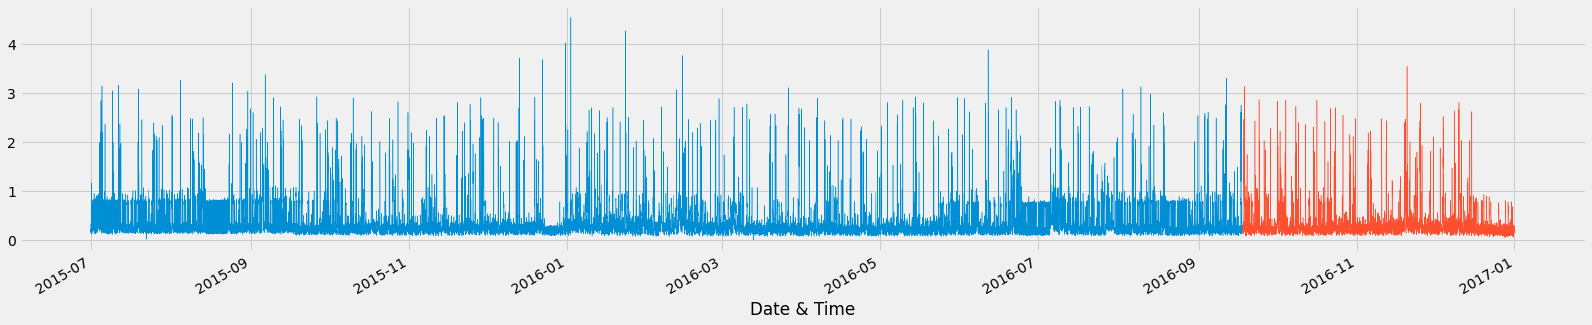

In [20]:
X_train['total'].plot(lw=0.5, figsize=(25,5))
X_test['total'].plot(lw=0.5)

In [106]:
# # Plot train and test so you can see where we have split
# X_train \
#     .rename(columns={'total': 'TRAIN SET'}) \
#     .merge(X_test.rename(columns={'total': 'TEST SET'}),
#           how='outer') \
#     .plot(figsize=(15,5), title='Train/test split', style='.',alpha= 0.5)
# plt.show()

In [21]:
X_train['ds']= X_train.index
X_test['ds'] = X_test.index

X_train = X_train[['ds','total']]
X_test = X_test[['ds','total']]

In [22]:
# Format data for prophet model using ds and y
X_train.reset_index() \
    .rename(columns={
                     'total':'y'}).head()

Date & Time                  ds         y
0 2015-07-01 00:30:00 2015-07-01 00:30:00  0.331396
1 2015-07-01 01:00:00 2015-07-01 01:00:00  0.226204
2 2015-07-01 01:30:00 2015-07-01 01:30:00  0.191217
3 2015-07-01 02:00:00 2015-07-01 02:00:00  0.158663
4 2015-07-01 02:30:00 2015-07-01 02:30:00  0.223958

In [23]:
X_train =X_train.reset_index()
X_train= X_train[['ds','total']]
X_train =X_train.rename(columns={"total":"y"})


In [24]:
X_train

ds         y
0     2015-07-01 00:30:00  0.331396
1     2015-07-01 01:00:00  0.226204
2     2015-07-01 01:30:00  0.191217
3     2015-07-01 02:00:00  0.158663
4     2015-07-01 02:30:00  0.223958
...                   ...       ...
21357 2016-09-17 22:00:00  0.218903
21358 2016-09-17 22:30:00  0.290400
21359 2016-09-17 23:00:00  0.300183
21360 2016-09-17 23:30:00  0.189539
21361 2016-09-18 00:00:00  0.276623

[21362 rows x 2 columns]

In [27]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

model= Prophet(interval_width=0.95)
model.fit(X_train)







# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(X_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='1 day', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       44454.5    0.00296322        454.96           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       44460.3   0.000303578       86.1604           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44463.6   0.000434989       306.487      0.4841      0.4841      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       44464.5   1.92098e-05       94.7164   9.823e-08       0.001      514  LS failed, Hessian reset 
     399       44464.6   1.55825e-05       69.7503      0.6728      0.6728      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     417       44464.7   1.54792e-05    

INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7c0ce1940>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       635.505   1.71231e-06        4821.1      0.4997       0.124      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       639.531   0.000963557       4594.73   1.938e-07       0.001      219  LS failed, Hessian reset 
     172       642.452   7.98732e-09       4895.95     0.08885     0.08885      276   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.6391
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       -6.6391             0       359.807       1e-12       0.001       25   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -135.767
Ite

Initial log joint probability = -5.62042Iteration  2. Log joint probability =    554.798. Improved by 203.036.

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       677.926   5.27659e-09       4545.86      0.1431      0.5599      113   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  3. Log joint probability =    565.026. Improved by 10.2284.
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  4. Log joint probability =    578.898. Improved by 13.8722.
      73       687.418   4.79949e-09       4654.46      0.3849      0.3849       91   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  5. Log joint probability =    584.572. Improved by 5.67316.
Iteration  6. Log joint probability =    602.908. Improved by 18.3

Iteration  2. Log joint probability =    659.344. Improved by 233.857.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  3. Log joint probability =    757.609. Improved by 98.2652.
      99       804.025   5.77763e-06       4870.14      0.9548      0.9548      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       804.082    1.6056e-06       4964.17   3.164e-10       0.001      221  LS failed, Hessian reset 
     150       804.092   9.80308e-09       5142.57       0.341       0.341      255   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  4. Log joint probability =    761.747. Improved by 4.13789.
       1      -8.49602             0   

Iteration  5. Log joint probability =    762.547. Improved by 0.799974.
Iteration  6. Log joint probability =    771.987. Improved by 9.44036.
Iteration  1. Log joint probability =    450.523. Improved by 720.474.
Iteration  7. Log joint probability =    772.218. Improved by 0.230277.
Iteration  8. Log joint probability =    772.266. Improved by 0.0486765.
Iteration  2. Log joint probability =    740.603. Improved by 290.08.
Iteration  9. Log joint probability =    772.314. Improved by 0.0471692.
Iteration  3. Log joint probability =    867.261. Improved by 126.658.
Iteration 10. Log joint probability =     772.38. Improved by 0.0663299.
Iteration 11. Log joint probability =    772.408. Improved by 0.0279001.
Iteration  4. Log joint probability =    869.552. Improved by 2.29173.
Iteration 12. Log joint probability =    772.411. Improved by 0.00291726.
Iteration  5. Log joint probability =     872.21. Improved by 2.65757.
Iteration 13. Log joint probability =    772.426. Improved by 0.0

Iteration  1. Log joint probability =     476.93. Improved by 792.538.
Iteration 33. Log joint probability =    876.732. Improved by 1.05933e-05.
Iteration 34. Log joint probability =    876.732. Improved by 1.81744e-05.
Iteration  2. Log joint probability =    496.952. Improved by 20.0225.
Iteration 35. Log joint probability =    876.732. Improved by 0.0003205.
Iteration  3. Log joint probability =    838.173. Improved by 341.221.
Iteration 36. Log joint probability =    876.732. Improved by 0.000145487.
Iteration  4. Log joint probability =    859.796. Improved by 21.623.
Iteration 37. Log joint probability =    876.732. Improved by 1.18893e-05.
Iteration  5. Log joint probability =    873.208. Improved by 13.4114.
Iteration 38. Log joint probability =    876.732. Improved by 8.70102e-05.
Iteration 39. Log joint probability =    876.732. Improved by 2.92578e-05.
Iteration  6. Log joint probability =    873.297. Improved by 0.0896969.
Iteration 40. Log joint probability =    876.732. 

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      42       44175.4   1.36121e-05        2847.3    4.92e-09       0.001      103  LS failed, Hessian reset 
      99         44178   3.58267e-05       2530.99       1.106      0.1106      191   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       44180.3   0.000177438       3636.26   5.339e-08       0.001      277  LS failed, Hessian reset 
     199       44181.7    3.2821e-05       2609.27           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       44184.3   2.00843e-05       2765.21           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       44185.4   0.000255496       3232.47   6.688e-08       0.001      578  LS failed, Hessian rese

INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7ab3b2220>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       687.773   4.59198e-09       4822.38      0.5974      0.5974      101   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       751.738   7.79863e-09       4784.59      0.6058      0.6058      117   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
      99       739.588   0.000113257       5036.56           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       742.521   0.000163966  

Iteration  2. Log joint probability =     490.59. Improved by 134.032.
Iteration  3. Log joint probability =    623.341. Improved by 132.751.
Iteration  4. Log joint probability =    640.079. Improved by 16.7386.
Iteration  5. Log joint probability =    647.524. Improved by 7.44489.
Iteration  6. Log joint probability =    651.622. Improved by 4.09793.
Iteration  7. Log joint probability =    652.651. Improved by 1.02917.
Iteration  8. Log joint probability =    654.176. Improved by 1.52487.
Iteration  9. Log joint probability =    654.358. Improved by 0.181857.
Iteration 10. Log joint probability =    654.387. Improved by 0.029101.
Iteration 11. Log joint probability =    654.535. Improved by 0.148402.
Iteration 12. Log joint probability =    654.606. Improved by 0.0703375.
Iteration 13. Log joint probability =    654.618. Improved by 0.0127796.
Iteration 14. Log joint probability =    654.651. Improved by 0.0327512.
Iteration 15. Log joint probability =    654.653. Improved by 0.0015

Iteration  1. Log joint probability =    445.295. Improved by 703.682.
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -302.187
Iteration  2. Log joint probability =    689.388. Improved by 244.093.
Iteration  1. Log joint probability =    383.119. Improved by 685.306.
Iteration  3. Log joint probability =    814.309. Improved by 124.921.
Iteration  2. Log joint probability =    858.303. Improved by 475.185.
Iteration  4. Log joint probability =    822.415. Improved by 8.10638.
Iteration  5. Log joint probability =    822.949. Improved by 0.533834.
Iteration  3. Log joint probability =    928.263. Improved by 69.9594.
Iteration  6. Log joint probability =    823.202

Iteration 30. Log joint probability =    931.861. Improved by 0.00626321.
Iteration  1. Log joint probability =    492.238. Improved by 840.083.
Iteration 31. Log joint probability =    931.862. Improved by 0.00101471.
Iteration  2. Log joint probability =    803.686. Improved by 311.448.
Iteration 32. Log joint probability =    931.869. Improved by 0.00697418.
Iteration  3. Log joint probability =    915.176. Improved by 111.49.
Iteration 33. Log joint probability =    931.869. Improved by 0.000211547.
Iteration  4. Log joint probability =    935.808. Improved by 20.6316.
Iteration 34. Log joint probability =    931.877. Improved by 0.0075422.
Iteration  5. Log joint probability =    949.665. Improved by 13.8571.
Iteration 35. Log joint probability =    931.896. Improved by 0.0193792.
Iteration  6. Log joint probability =    952.052. Improved by 2.3877.
Iteration 36. Log joint probability =    931.899. Improved by 0.0027472.
Iteration  7. Log joint probability =    953.056. Improved b

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      37       44174.2   0.000324597       2975.35   1.354e-07       0.001       98  LS failed, Hessian reset 
      66       44175.7    1.9803e-05       2480.43   6.832e-09       0.001      173  LS failed, Hessian reset 
      99       44176.4   0.000673394       3304.41      0.8246      0.8246      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       44177.9   0.000701819       2779.04   2.144e-07       0.001      274  LS failed, Hessian reset 
     161       44179.2   2.48915e-06       2487.63   8.507e-10       0.001      412  LS failed, Hessian reset 
     171       44179.2   5.47407e-08       2440.91       0.184      0.3398      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7aacc4ca0>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65        688.68   5.05296e-09       4904.72      0.1688      0.1688       89   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.6391
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       -6.6391             0       359.807       1e-12       0.001       25   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -200.239
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       742.428   0.000451198       4736.58   8.499e-08       0.001      126  LS failed, Hessian reset 


      99       743.604   4.52992e-07       5071.29      0.4139      0.4139      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       743.608   6.56583e-09          4824      0.0572      0.0572      183   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  1. Log joint probability =    177.095. Improved by 377.334.
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       752.642   5.08133e-09       5013.47       0.696       0.696       99   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  2. Log joint probability =    576.494. Improved by 399.399.
Iteration  3. Log joint probability =    646.028. Improved by 69.5342.
Iteration  4. Log joint probability =    646.527. Improved by 0.498272.
Iteration  5. Log j


Initial log joint probability = -290.624
Iteration 49. Log joint probability =    654.254. Improved by 0.00194369.
Iteration 50. Log joint probability =    654.256. Improved by 0.00235136.
Iteration  1. Log joint probability =    402.146. Improved by 692.77.
Iteration 51. Log joint probability =    654.258. Improved by 0.00192468.
Iteration  2. Log joint probability =    655.347. Improved by 253.201.
Iteration 52. Log joint probability =    654.261. Improved by 0.0023552.
Iteration  3. Log joint probability =    806.822. Improved by 151.474.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 53. Log joint probability =    654.262. Improved by 0.00190569.
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated 

     174       854.595   5.28411e-09       4271.57      0.3797      0.3797      315   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Iteration  5. Log joint probability =    826.199. Improved by 8.9638.
Iteration 56. Log joint probability =    654.269. Improved by 0.00236296.
Iteration  1. Log joint probability =    472.583. Improved by 807.006.
Iteration  6. Log joint probability =    826.378. Improved by 0.179589.
Iteration 57. Log joint probability =    654.271. Improved by 0.00186779.
Iteration  7. Log joint probability =    826.619. Improved by 0.240682.
Iteration 58. Log joint probability =    654.273. Improved by 0.00236688.
Iteration  2. Log joint probability =     693.35. Improved by 220.767.
Iteration  8. Log joint probability =    826.721. Improved by 0.101477.
Iteration 59. Log joint probability =    654.275. Improved by 0.00184889.
Iteration  9. Log joint probability =    826.762. Improved by 0.0414435.
Iteration 6

Iteration 159. Log joint probability =    654.468. Improved by 0.00122407.
Iteration  1. Log joint probability =    433.383. Improved by 813.464.
Iteration 160. Log joint probability =     654.47. Improved by 0.00230519.
Iteration 161. Log joint probability =    654.472. Improved by 0.00121645.
Iteration  2. Log joint probability =    864.135. Improved by 430.753.
Iteration 162. Log joint probability =    654.474. Improved by 0.00230028.
Iteration 163. Log joint probability =    654.475. Improved by 0.00120886.
Iteration  3. Log joint probability =    951.863. Improved by 87.7273.
Iteration 164. Log joint probability =    654.477. Improved by 0.00229539.
Iteration 165. Log joint probability =    654.479. Improved by 0.00120128.
Iteration  4. Log joint probability =    951.942. Improved by 0.0790978.
Iteration 166. Log joint probability =    654.481. Improved by 0.00229053.
Iteration 167. Log joint probability =    654.482. Improved by 0.00119373.
Iteration  5. Log joint probability =  

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -79.7855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       44179.1   0.000596678       3882.14   1.805e-07       0.001      141  LS failed, Hessian reset 
      86       44182.7   3.20264e-05       3363.14   1.209e-08       0.001      218  LS failed, Hessian reset 
      99       44182.8   5.73441e-07       2545.65           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       44182.9   3.74746e-05       3206.05   1.713e-08       0.001      324  LS failed, Hessian reset 
     155       44183.1   1.06844e-06       2830.87   3.817e-10       0.001      446  LS failed, Hessian reset 
     184       44183.2   1.23548e-07       2823.55       0.316           1      485   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Making 874 forecasts with cutoffs between 2015-07-08 12:00:00 and 2016-09-17 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb7ad206cd0>


Initial log joint probability = -5.52405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       688.697   5.15339e-09       5124.14      0.1224      0.1224       89   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -5.62042
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       741.961    0.00170826       4634.47           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       742.174   0.000203287       4880.17   4.386e-08       0.001      173  LS failed, Hessian reset 
Initial log joint probability = -6.20616
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       752.664   7.17402e-09       4568.24      0.2383      0.2383       91   
Optimization terminated normally

Iteration  1. Log joint probability =    139.789. Improved by 372.265.
Iteration  2. Log joint probability =    167.322. Improved by 27.5326.
Iteration  3. Log joint probability =    637.041. Improved by 469.719.
Iteration  4. Log joint probability =    644.903. Improved by 7.86222.
Iteration  5. Log joint probability =    645.289. Improved by 0.385927.
Iteration  6. Log joint probability =    655.076. Improved by 9.78692.
Iteration  7. Log joint probability =    655.119. Improved by 0.0429632.
Iteration  8. Log joint probability =     655.17. Improved by 0.0511552.
Iteration  9. Log joint probability =    655.345. Improved by 0.175274.
Iteration 10. Log joint probability =    655.389. Improved by 0.0430811.
Iteration 11. Log joint probability =    655.418. Improved by 0.0297614.
Iteration 12. Log joint probability =     655.43. Improved by 0.0114579.
Iteration 13. Log joint probability =    655.446. Improved by 0.0164902.
Iteration 14. Log joint probability =    655.454. Improved by 0

Iteration  1. Log joint probability =    417.941. Improved by 740.801.
Initial log joint probability = -6.42153
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -8.49602
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -8.49602             0       502.746       1e-12       0.001       29   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -366.66
      98       854.518   6.48723e-09       4419.92      0.2935      0.2935      126   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


Iteration  2. Log joint probability =    499.238. Improved by 81.2968.
Iteration  1. Log joint probability =    242.581. Improved by 609.241.
Iteration  3. Log joint probability =    600.472. Improved by 101.234.
Iteration  4. Log joint probability =    729.842. Improved by 129.37.
Iteration  2. Log joint probability =    810.805. Improved by 568.224.
Iteration  5. Log joint probability =    790.428. Improved by 60.5856.
Iteration  3. Log joint probability =    884.085. Improved by 73.28.
Iteration  6. Log joint probability =    814.944. Improved by 24.5157.
Iteration  4. Log joint probability =    910.657. Improved by 26.5719.
Iteration  7. Log joint probability =    820.977. Improved by 6.03295.
Iteration  5. Log joint probability =    931.426. Improved by 20.7694.
Iteration  6. Log joint probability =    932.253. Improved by 0.826616.
Iteration  8. Log joint probability =      821.2. Improved by 0.223368.
Iteration  7. Log joint probability =     932.63. Improved by 0.377749.
Iterat

Iteration 37. Log joint probability =    933.144. Improved by 2.50375e-07.
Iteration 38. Log joint probability =    826.975. Improved by 1.19695e-06.
Iteration  1. Log joint probability =    374.458. Improved by 786.775.
Iteration 38. Log joint probability =    933.144. Improved by 1.28993e-06.
Iteration 39. Log joint probability =    826.975. Improved by 3.24206e-07.
Iteration 39. Log joint probability =    933.144. Improved by 4.83737e-07.
Iteration  2. Log joint probability =    877.498. Improved by 503.04.
Iteration 40. Log joint probability =    826.975. Improved by 6.97331e-08.
Iteration 40. Log joint probability =    933.144. Improved by 2.81675e-07.
Iteration 41. Log joint probability =    826.975. Improved by 3.08565e-07.
Iteration  3. Log joint probability =     904.62. Improved by 27.1214.
Iteration 41. Log joint probability =    933.144. Improved by 1.66124e-07.
Iteration 42. Log joint probability =    826.975. Improved by 9.17687e-08.
Iteration  4. Log joint probability = 

KeyboardInterrupt: 

      99       41587.9   4.47045e-05       2517.55           1           1      135   


In [48]:
X_test = X_test.reset_index().rename(columns={'total':'y'})

X_test=X_test[['ds','y']]

In [49]:
prediction= model.predict(X_test)

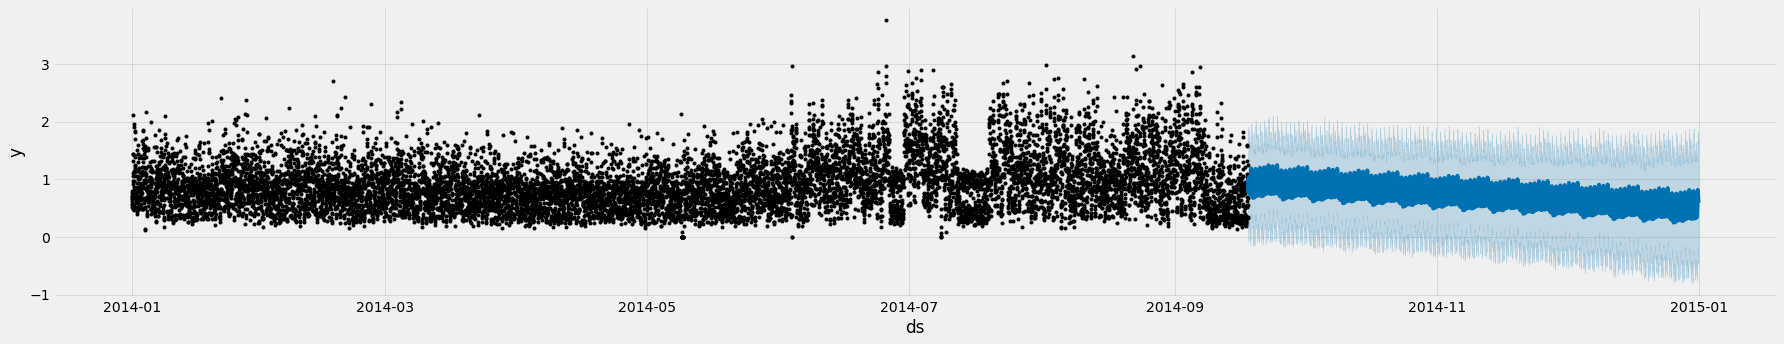

In [50]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(25)
fig = model.plot(prediction,
                 ax=ax)
plt.show()

### Using XGBoost for Time Series data

In [225]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
from matplotlib.patches import Patch

plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
import warnings
warnings.filterwarnings('ignore')

In [54]:
split_date = "2014-09-18"
home_train = home_a.loc[home_a.index <=split_date].copy()
home_test = home_a.loc[home_a.index >split_date].copy()

In [238]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    cols= df.columns
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night'] = np.where((df['hour']>=18)| (df['hour']<6),1,0)
    df['lag_hour'] = df['total'].shift(periods=2)
    df['lag_day'] = df['total'].shift(periods=48)
    df['lag_week'] = df['total'].shift(periods=336)
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth', 'night', 'lag_hour','lag_day','lag_week']]
    if label:
        y = df[label]
        return X, y
    return X, cols


In [239]:
X_train, y_train = create_features(home_train, label="total")
X_test, y_test = create_features(home_test, label="total")

In [240]:
X,y = create_features(home_a, label='total')

In [241]:
reg = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


In [242]:
xgb_grid = GridSearchCV(reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [243]:
X=X.reset_index()
X.drop("Date & Time", axis=1,inplace=True)

In [244]:
X=X.values

In [245]:
tscv = TimeSeriesSplit(n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000)


In [246]:
def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

In [247]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(xgb_grid, X, y, cv=tscv)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[15:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.[15:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.

[15:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent"

In [251]:
xgb_grid.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [252]:

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_grid.fit(
        X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)
    


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[16:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

In [254]:
xgb_grid.n_splits_

2

In [112]:
xgb_grid.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [253]:
home_test['prediction'] = xgb_grid.predict(X_test)

ValueError: Length of values (1000) does not match length of index (5045)

In [ ]:
home_all= pd.concat([home_train, home_test], sort=False)

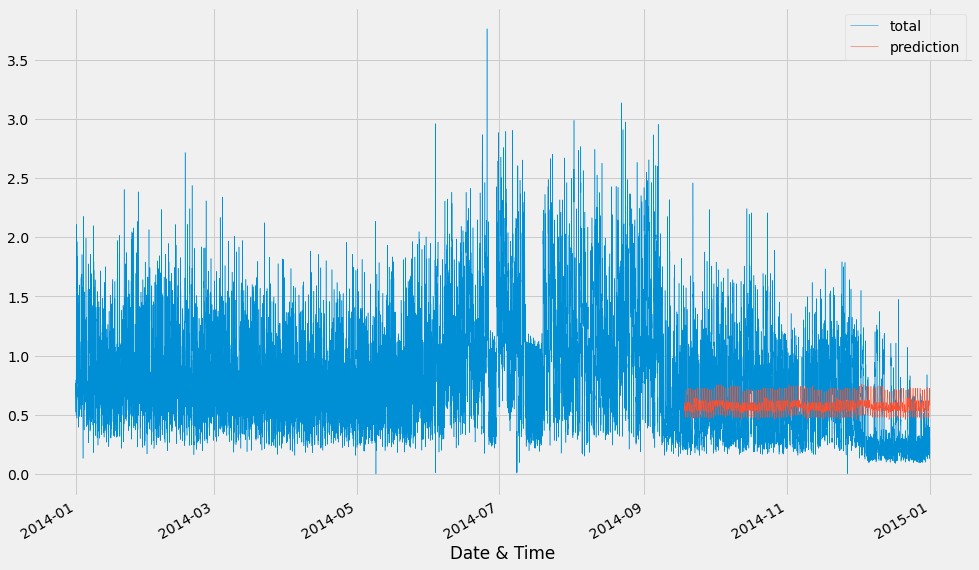

In [ ]:
_=home_all[['total','prediction']].plot(figsize=(15,10), lw=0.5)

### Using LSTMs 